In [1]:
%run auxiliary.ipynb

In [8]:
all_releases_df = pd.read_csv('all_releases_no_repetitions.csv')
all_releases_df = all_releases_df.drop(['Path'], axis=1)

In [9]:
all_releases_df.describe()

,CBO,CC,DIT,LCOM,LOC,NOC,RFC,WMC,class_frequency,will_change,number_of_changes,change_probability
count,4183.000000,4183.000000,4183.000000,4183.000000,4183.000000,4183.000000,4183.000000,4183.000000,4183.000000,4183.000000,4183.000000,4183.000000
mean,7.107339,15.918719,0.785082,0.179809,36.814487,0.612718,9.966053,1.558212,3.908917,0.074588,0.120249,0.025026
std,12.305850,30.343862,1.764994,0.289973,91.211321,6.545734,25.694789,4.244770,1.982244,0.262756,0.429238,0.089901
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,3.000000,8.000000,0.000000,0.000000,12.000000,0.000000,1.000000,0.000000,4.000000,0.000000,0.000000,0.000000
75%,9.000000,15.000000,0.000000,0.330000,30.000000,0.000000,9.000000,2.000000,6.000000,0.000000,0.000000,0.000000
max,162.000000,488.000000,7.000000,1.000000,1369.000000,189.000000,413.000000,56.000000,8.000000,1.000000,5.000000,0.750000


In [16]:
scaler = MinMaxScaler()

X_features = ['CBO','CC','DIT','LCOM','LOC','NOC','RFC','WMC']

all_releases_df = all_releases_df.drop(['class_frequency','number_of_changes','change_probability'], axis=1)

all_releases_df[X_features] = scaler.fit_transform(all_releases_df[X_features])

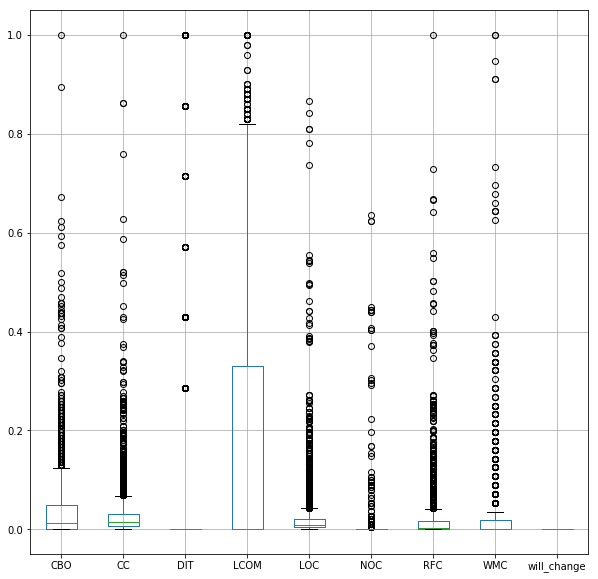

In [17]:
all_releases_df[all_releases_df.will_change == 0].boxplot(figsize=(10, 10))

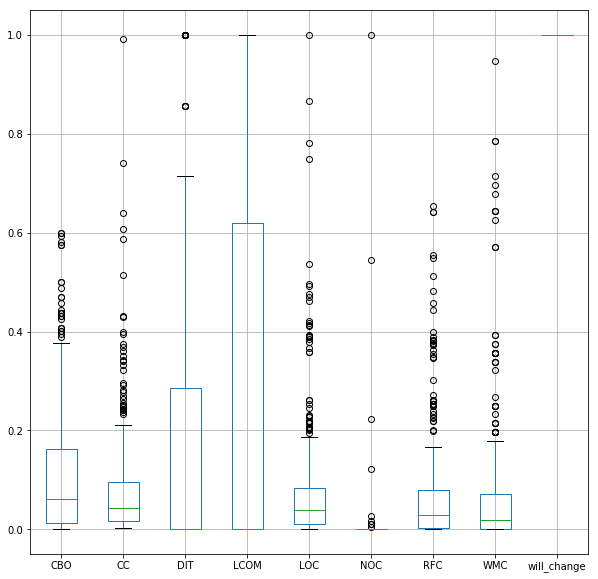

In [18]:
all_releases_df[all_releases_df.will_change == 1].boxplot(figsize=(10, 10))

will_change
0    3871
1     312
Name: will_change, dtype: int64

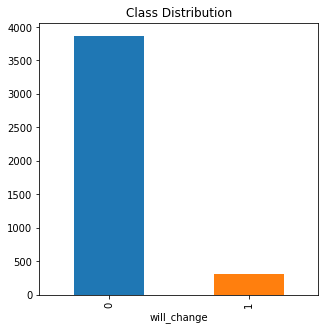

In [19]:
ax = all_releases_df.groupby(['will_change'])['will_change'].count().plot.bar(title="Class Distribution", figsize=(5,5))
all_releases_df.groupby(['will_change'])['will_change'].count()

In [20]:
all_releases_df.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,CBO,CC,DIT,LCOM,LOC,NOC,RFC,WMC,will_change
CBO,1.0,0.67,0.48,0.19,0.62,-0.022,0.89,0.53,0.25
CC,0.67,1.0,0.24,0.25,0.75,0.038,0.73,0.69,0.24
DIT,0.48,0.24,1.0,0.15,0.29,0.036,0.35,0.24,0.096
LCOM,0.19,0.25,0.15,1.0,0.21,-0.0017,0.22,0.28,0.11
LOC,0.62,0.75,0.29,0.21,1.0,0.036,0.69,0.62,0.25
NOC,-0.022,0.038,0.036,-0.0017,0.036,1.0,-0.022,0.12,0.025
RFC,0.89,0.73,0.35,0.22,0.69,-0.022,1.0,0.6,0.23
WMC,0.53,0.69,0.24,0.28,0.62,0.12,0.6,1.0,0.19
will_change,0.25,0.24,0.096,0.11,0.25,0.025,0.23,0.19,1.0
